# Problem 1

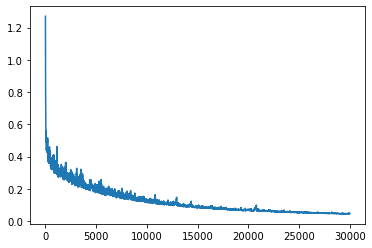

In [9]:

import numpy as np
import matplotlib.pyplot as plt


N , p = 30 , 20
np . random . seed (0)
X = np . random . randn (N , p )
Y = 2* np . random . randint (2 , size = N ) - 1


theta = np.random.rand(p)


def f(theta):
    sum = 0
    for i in range(N):
        sum += np.log(1+np.exp(-Y[i]*X[i].T@theta))
    return sum/N


epoch =  1000
lr = 0.1
result = []

for _ in range(epoch):
    for rep in range(N):
        i = np.random.randint(30)
        Xi = X[i]
        Yi = Y[i]
        
        gradient = -Yi * Xi/(1+np.exp(Yi * (Xi.T @ theta)))
        
        theta = theta - gradient * lr
        
        result.append(f(theta))
        
x = np.arange(epoch*N)
plt.plot(x, result)
plt.show()
        
        
        
        



# Problem 2

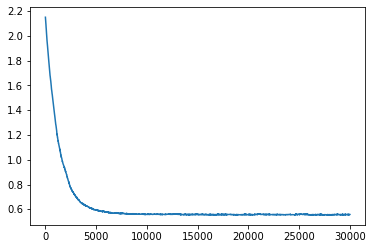

Does it encounter a point of non-differentiability? :  False


In [12]:

import numpy as np
import matplotlib.pyplot as plt


N , p = 30 , 20
np . random . seed (0)
X = np . random . randn (N , p )
Y = 2* np . random . randint (2 , size = N ) - 1


theta = np.random.rand(p)
l = 0.1

def f(theta):
    sum = 0
    for i in range(N):
        sum += max(0, 1-Y[i]*X[i].T@theta) + l*np.linalg.norm(theta)**2
    return sum/N


epoch =  1000
lr = 0.001
result = []
encounter = False

for _ in range(epoch):
    for rep in range(N):
        i = np.random.randint(30)
        Xi = X[i]
        Yi = Y[i]
        
        encounter = encounter or (Yi*Xi.T@theta ==1)
        
        gradient = 2*l*theta - Yi*Xi*(Yi*Xi.T@theta < 1)
        
        theta = theta - gradient * lr
        
        result.append(f(theta))
        
x = np.arange(epoch*N)
plt.plot(x, result)
plt.show()
        
print("Does it encounter a point of non-differentiability? : ", encounter)
        
        
        



# Problem 3

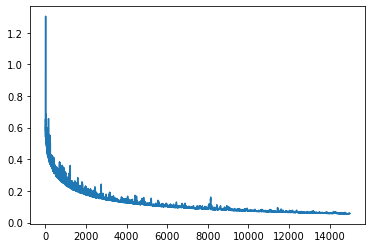

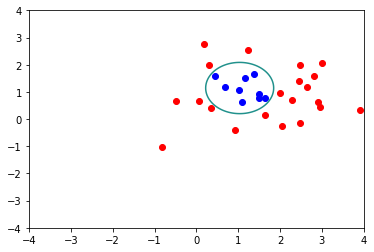

linearly separable with the help of kernel methods :  True


In [32]:
import numpy as np
import matplotlib.pyplot as plt

N =30
np . random . seed (0)
X = np . random . randn (2 , N )
y = np . sign ( X [0 ,:]**2+ X [1 ,:]**2 -0.7)
theta = 0.5
c , s = np . cos ( theta ) , np . sin ( theta )
X = np . array ([[ c , -s ] , [s , c ]]) @X
X = X + np . array ([[1] ,[1]])



xcoord_red =[]
ycoord_red =[]
xcoord_blue = []
ycoord_blue = []
for i in range(N):
    if(y[i]==1):
        xcoord_red.append(X[0][i])
        ycoord_red.append(X[1][i])
    else:
        xcoord_blue.append(X[0][i])
        ycoord_blue.append(X[1][i])
        




w = np.random.rand(5)

phiX = []
for i in range(N):
    phiX.append([1, X[0][i], X[0][i]**2, X[1][i], X[1][i]**2 ])
phiX = np.array(phiX)


def f(w):
    sum = 0
    for i in range(N):
        sum += np.log(1+np.exp(-y[i]*phiX[i].T@w))
    return sum/N



epoch =  500
lr = 0.1
result = []

for _ in range(epoch):
    for rep in range(N):
        i = np.random.randint(N)
        Xi = phiX[i]
        Yi = y[i]
        
        gradient = -Yi * Xi/(1+np.exp(Yi * (Xi.T @ w)))
        
        w = w - gradient * lr
        
        
        result.append(f(w))
        
x = np.arange(epoch*N)
plt.plot(x, result)
plt.show()
        


xx = np . linspace ( -4 , 4 , 1024)
yy = np . linspace ( -4 , 4 , 1024)
xx , yy = np . meshgrid ( xx , yy )
Z = w [0] + ( w [1] * xx + w [2] * xx **2) + ( w [3] * yy + w [4] * yy **2)
plt . contour ( xx , yy , Z , 0)
plt.scatter(xcoord_red, ycoord_red, color='red')
plt.scatter(xcoord_blue, ycoord_blue, color='blue')
plt.show()

linearly_separable = True
for i in range(N):
    if(phiX[i]@w * y[i] <0 ):
        linearly_separable = False
print("linearly separable with the help of kernel methods : ", linearly_separable)
